In [1]:
## This Script generates first Figure of Mayr et al, 2020
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

folder = "/191118_MLT-ASK_multiomics/"
sc.logging.print_version_and_date()

Running Scanpy 1.4.5.post2.dev1+g0b619e25, on 2020-02-06 10:04.


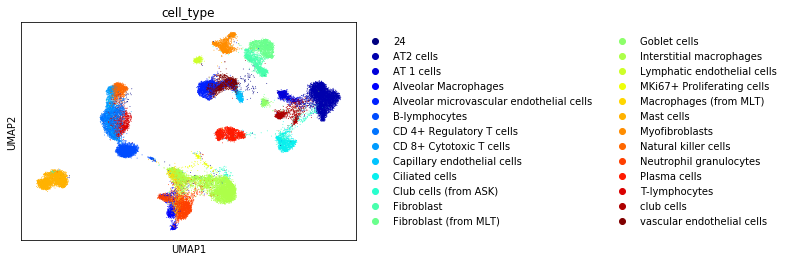

In [3]:
## Munich Cohort - human data set
adata = sc.read(folder + "final_bbknn_allhuman_191204_MA_sparse.h5ad")
sc.pl.umap(adata, color = "cell_type")

### Figure 1

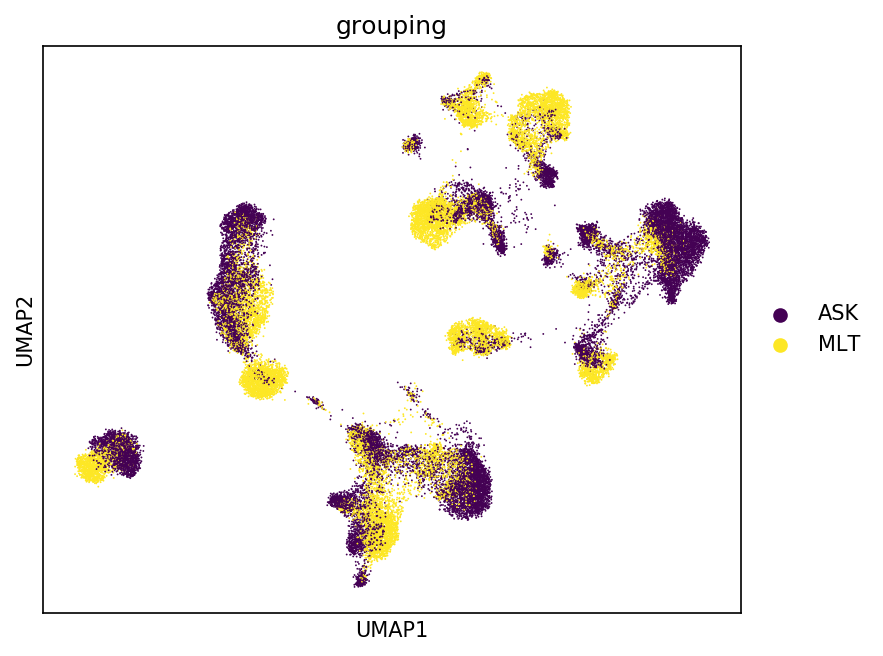

In [4]:
sc.pl.umap(adata, color = "grouping", ax = plt.figure(figsize = (6, 5), dpi = 150).gca())

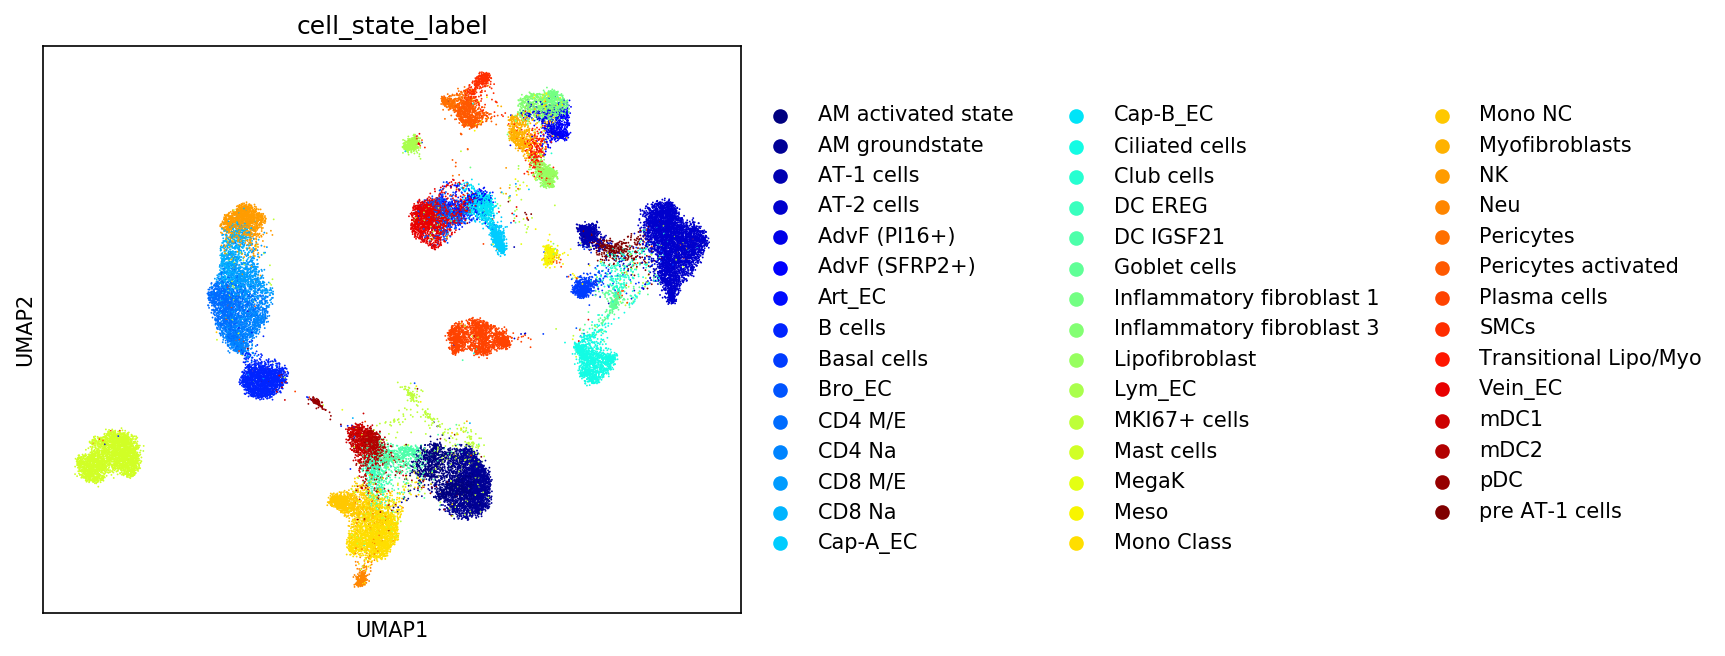

In [5]:
sc.pl.umap(adata, color = "cell_state_label", ax = plt.figure(figsize = (6, 5), dpi = 150).gca())

### Feature Plots - Figure 1 c d e f

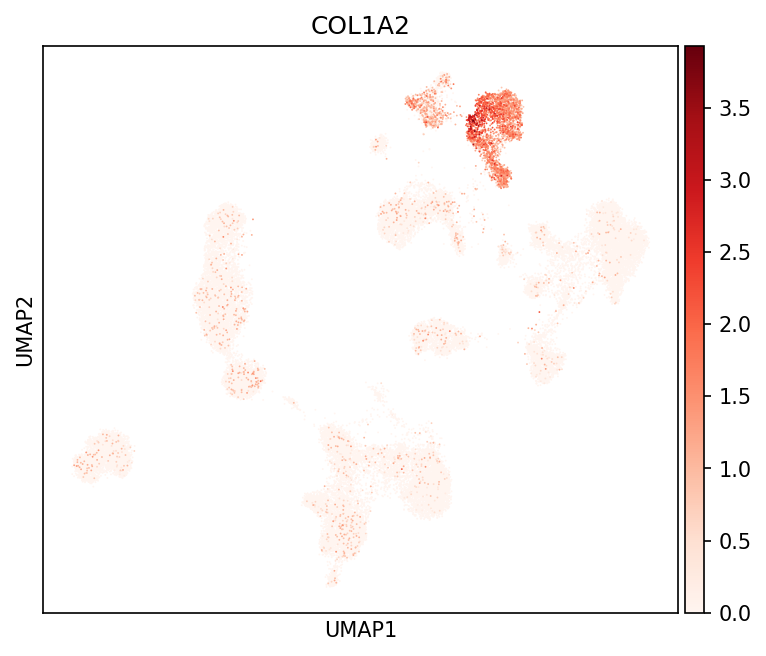

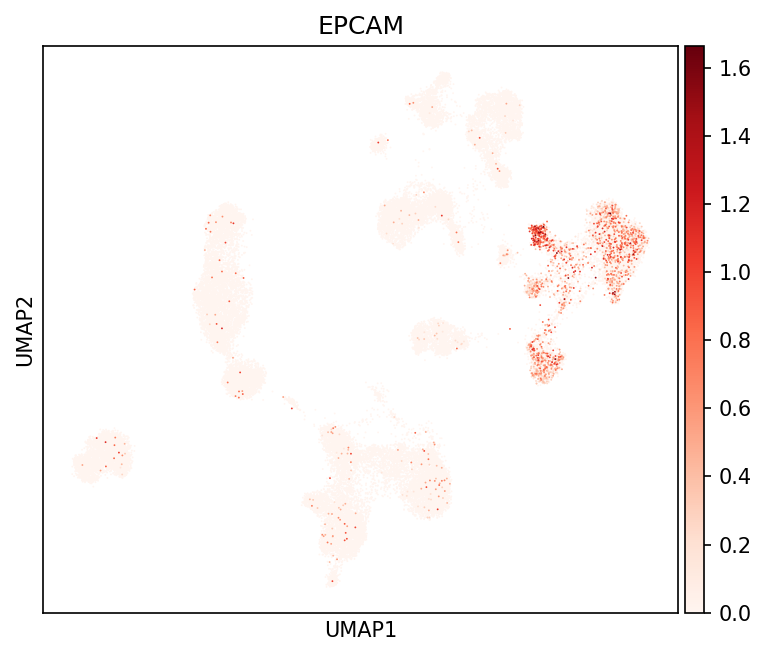

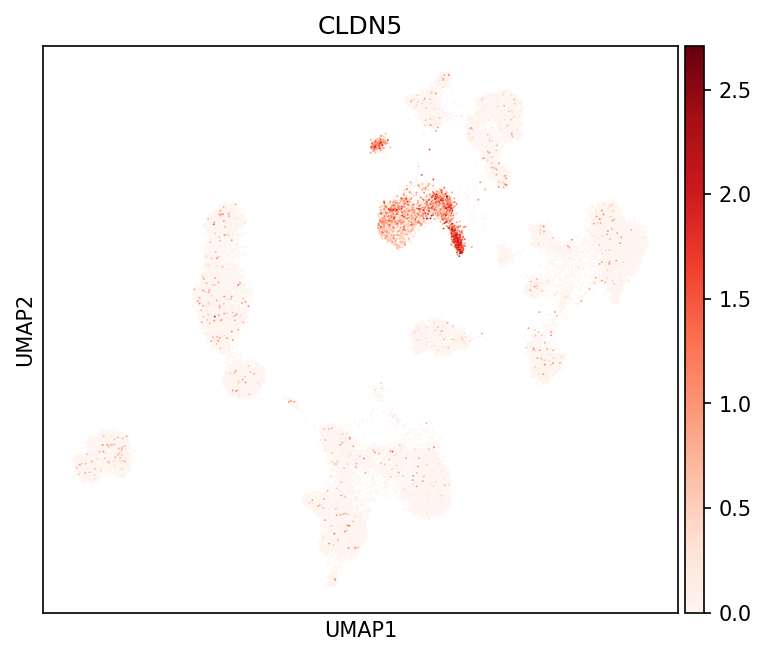

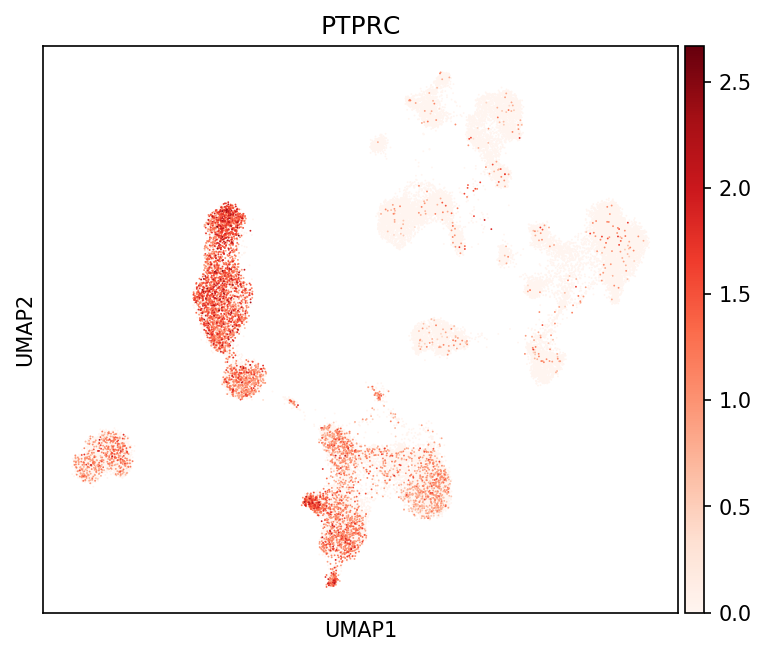

In [6]:
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

for gene in ["COL1A2", "EPCAM", "CLDN5", "PTPRC"]:
    sc.pl.umap(adata, color = gene, ax = plt.figure(figsize = (6, 5), dpi = 150).gca(), cmap = mymap)

### Matrix plots for Subsets - Figure 1 g h i j

In [7]:
## Subset to COL1A2+ Mesenchyme and exclude low quality cells
mes = adata[adata.obs["louvain"].isin(["27", "11", "5", "23","30"])]
mes = mes[-(mes.obs["patients"].isin(["ASK 448", "ASK 479", "ASK 455"])) | (mes.obs["louvain"].isin(["6"]))].copy()

## Subset to EPCAM+ Epithelium
epithel = adata[adata.obs.louvain.isin(["20", "3", "13", "26", "10", "29", "12"])].copy()

## Subset to CLDN5+ Endothel
endothel = adata[adata.obs.louvain.isin(["2", "17", "25", "28"])].copy()

## Subset to PTPRC Leukocytes and Myeloid
macro = adata[adata.obs["louvain"].isin(["9", "14", "15", "19","22", "34", "6", "16", "35","24", "1", "21", "31",
                                         "38","0", "8","18","37","7","33","4"])].copy()

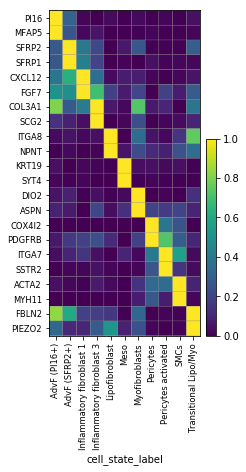

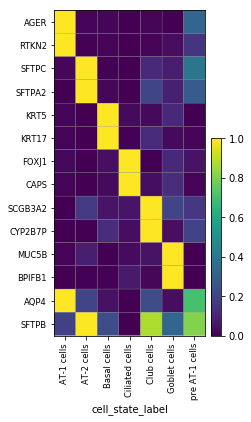

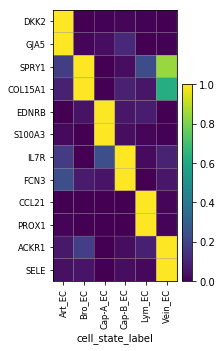

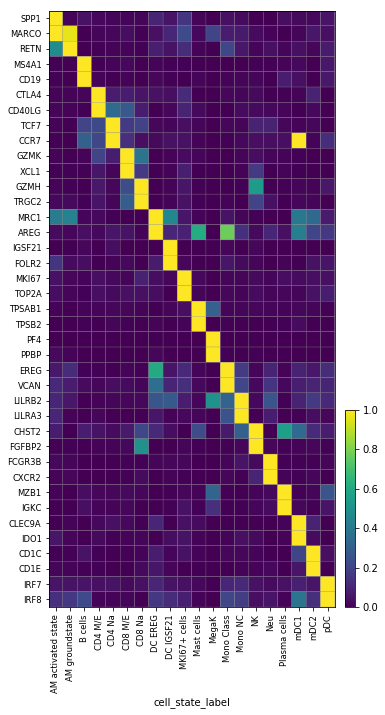

GridSpec(2, 3, height_ratios=[0, 11], width_ratios=[5.3, 0, 0.2])

In [9]:
mes_markers = ["PI16", "MFAP5", "SFRP2", "SFRP1", "CXCL12", "FGF7", "COL3A1", "SCG2", "ITGA8", "NPNT", "KRT19",
               "SYT4", "DIO2", "ASPN", "COX4I2", "PDGFRB", "ITGA7", "SSTR2", "ACTA2","MYH11", "FBLN2", "PIEZO2"]
sc.pl.matrixplot(mes, mes_markers, groupby = "cell_state_label", swap_axes = True, 
                 standard_scale = "var", figsize=(3,6))

epithel_markers=["AGER", "RTKN2", "SFTPC", "SFTPA2", "KRT5", "KRT17", "FOXJ1", "CAPS",
                 "SCGB3A2", "CYP2B7P", "MUC5B","BPIFB1", "AQP4", "SFTPB"]
sc.pl.matrixplot(epithel, epithel_markers, groupby = "cell_state_label", swap_axes = True, 
                 figsize=(3,6), standard_scale = "var")

endothel_markers=["DKK2", "GJA5", "SPRY1", "COL15A1", "EDNRB", "S100A3", "IL7R", 
                  "FCN3", "CCL21", "PROX1", "ACKR1", "SELE"]
sc.pl.matrixplot(endothel, endothel_markers, groupby = "cell_state_label", standard_scale = "var", 
                 swap_axes = True, figsize = (2.5, 5))

macro_markers = ["SPP1", "MARCO", "RETN", "MS4A1", "CD19", "CTLA4", "CD40LG", "TCF7", "CCR7", "GZMK", "XCL1",
                 "GZMH", "TRGC2", "MRC1", "AREG", "IGSF21", "FOLR2", "MKI67", "TOP2A", "TPSAB1", "TPSB2", "PF4", 
                 "PPBP", "EREG", "VCAN", "LILRB2", "LILRA3", "CHST2", "FGFBP2", "FCGR3B", "CXCR2", "MZB1",
                 "IGKC", "CLEC9A", "IDO1", "CD1C", "CD1E", "IRF7", "IRF8"]
sc.pl.matrixplot(macro, macro_markers, groupby = "cell_state_label", swap_axes = True,
                 standard_scale = "var", figsize = (5.5,11))